## Aplicação do algoritmo K-means

Este trabalho consiste na aplicação do algoritmo K-means utilizando a biblioteca Scikit Learn do Python. O problema escolhido é caracterizado como problema de agrupamento, onde deseja-se definir grupos de clientes através de informações como: idade, sexo, renda anual e pontuação de gastos. Queremos saber quais grupos de clientes são mais indicados para aplicar uma estratégia de vendas. Os dados foram obtidos através da plataforma Kaggle (https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv).


### Importando as bibliotecas que serão utilizadas

In [57]:
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler #Z-score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

dataframe = pd.read_csv("mallCustomers.csv")

dataframe.drop('CustomerID',axis =1 , inplace=True)
dataframe.columns = [ 'Gender', 'Age', 'Annual Income','Spending Score']
dataframe.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Visualizando a distribução dos dados

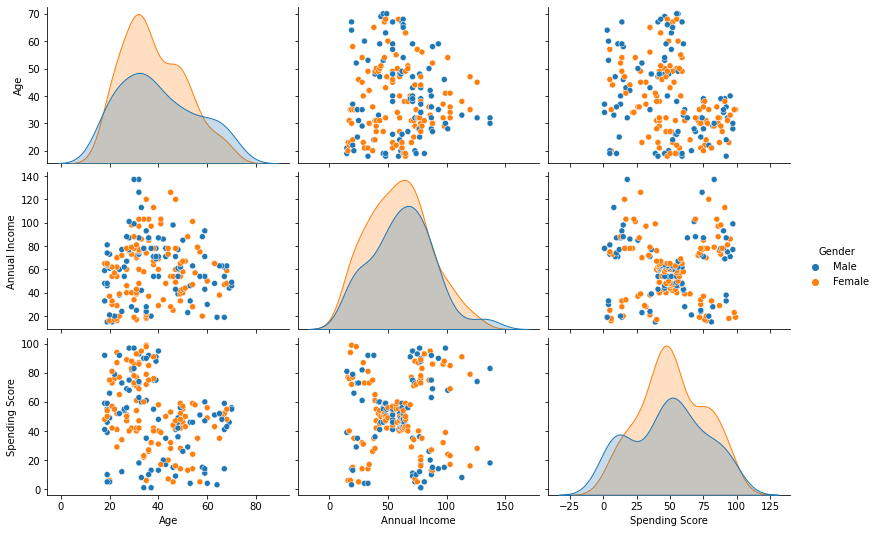

In [58]:
sb.pairplot(dataframe, hue = 'Gender', aspect = 1.5)
plt.show()

### Utilizando a estratégia Elbow para definir a quantidade de klusters

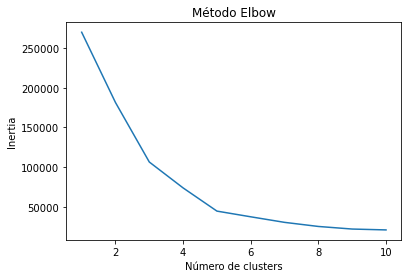

In [59]:
X = dataframe[['Annual Income', 'Spending Score']]
#X = dataframe

clusters = []

for i in range(1,11):
    km = KMeans(n_clusters= i, init='k-means++', random_state=0)
    km.fit(X)
    clusters.append(km.inertia_)


plt.plot(range(1,11),clusters)
plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('Inertia')
plt.show() 

Conforme podemos observar pelo gráfico, o número 5 é a quantidade ideal de klusters para iniciar o K-means.

### Utilizando o K-means

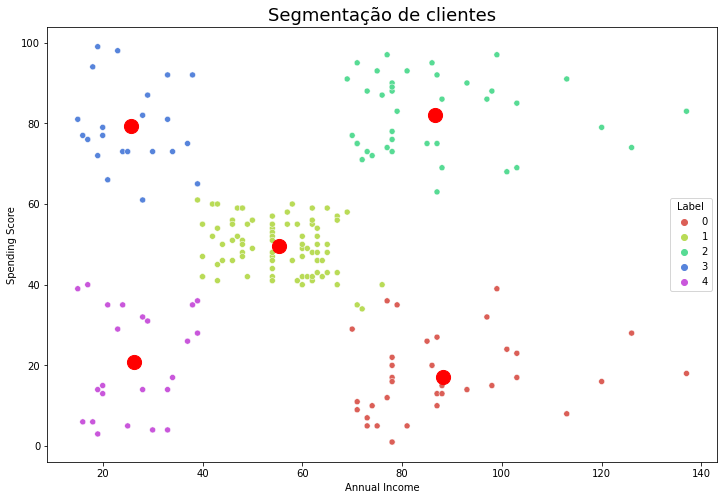

In [60]:
kMeans = KMeans(
    n_clusters=5, #quantidade de clusters
    init='k-means++',
    n_init = 10,
    random_state=0)

kMeans.fit(X)
centroids = kMeans.cluster_centers_
X['Label'] = kMeans.labels_
#X['Gender'], X['Age'],

plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income'], X['Spending Score'], hue=X['Label'], palette=sns.color_palette('hls', 5))

plt.scatter(centroids[:,0], centroids[:,1], c='red',s=200)

plt.title('Segmentação de clientes',fontsize=18)
plt.show()

Podemos observar que os grupos 1, 2 e 3 são os mais indicados para se aplicar uma campanha de marketing, pois tendem a consumir mais.